In [363]:
import numpy as np
import pandas as pd
import json
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# conn = sqlite3.connect('parsed_links.sqlite')
# cur = conn.cursor()

# json_spec = pd.read_sql_query('SELECT id, json FROM Urls', conn)
# df = pd.DataFrame(json_spec)
# # df.set_index('id', inplace=True)
# df.head()

In [343]:

df_pre = pd.read_json('all_properties.json', orient='index', convert_axes=False)
df_pre = df_pre.set_index('Listing Number')
df_pre.head()

,Price,Blurb,Type of Property,Occupation Date,Lease Period,Pets Allowed,Bedrooms,Bedroom 1,Bedroom 2,Bathroom,...,Other,Special Featuress,Special Features 1,Special Features 2,Special Features 3,Special Features 4,Special Features 5,Other 1,Other 2,Pools
Listing Number,,,,,,,,,,,,,,,,,,,,,
109917825,R 11 500,2 Bedroom House to rent in Walmer Estate,House,06 April 2023,12 Months,Yes,2.0,Built-in Cupboards,Built-in Cupboards,"Shower, Toilet and Basin",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112504329,R 3 500 000,5 Bedroom House on auction in Vredehoek,House,NaN,NaN,Yes,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112318432,R 3 995 000,3 Bedroom House for sale in Gardens,House,NaN,NaN,Yes,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112562574,R 5 000 000,4 Bedroom House for sale in Vredehoek,House,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112556845,R 12 840,2 Bedroom House to rent in Stellenbosch Central,House,01 May 2023,NaN,Yes,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 109917825 to 111817306
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    32 non-null     object 
 1   Blurb                    32 non-null     object 
 2   Type of Property         32 non-null     object 
 3   Occupation Date          12 non-null     object 
 4   Lease Period             8 non-null      object 
 5   Pets Allowed             21 non-null     object 
 6   Bedrooms                 30 non-null     float64
 7   Bedroom 1                9 non-null      object 
 8   Bedroom 2                9 non-null      object 
 9   Bathroom                 1 non-null      object 
 10  Kitchen                  11 non-null     object 
 11  Lounge                   5 non-null      object 
 12  Parking                  15 non-null     object 
 13  Standalone Building      4 non-null      object 
 14  Nearby Public Tran

### Structure df so that only columns that are most likely to contain data remain for now

In [345]:
df_nulls = df_pre.isnull().sum().sort_values()
df_nulls.head(10)

Price                0
Blurb                0
Type of Property     0
Bathrooms            1
Bedrooms             2
Pets Allowed        11
Erf Size            12
Listing Date        12
Parking             17
Floor Size          18
dtype: int64

**Keep price,type,bath,bed, blurb**

In [346]:
# List of columns to keep
columns_to_keep = ['Price', 'Blurb', 'Type of Property', 'Bathrooms', 'Bedrooms']

# Drop all columns except the specified list
df = df_pre[columns_to_keep]
df

,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
109917825,R 11 500,2 Bedroom House to rent in Walmer Estate,House,NaN,2.0
112504329,R 3 500 000,5 Bedroom House on auction in Vredehoek,House,3.0,5.0
112318432,R 3 995 000,3 Bedroom House for sale in Gardens,House,1.0,3.0
112562574,R 5 000 000,4 Bedroom House for sale in Vredehoek,House,3.0,4.0
112556845,R 12 840,2 Bedroom House to rent in Stellenbosch Central,House,1.0,2.0
112373972,R 8 000,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0
112004050,R 9 750,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0
112517289,R 3 950 000,4 Bedroom House for sale in Gardens,House,2.0,4.0
112461251,R 2 950 000,2 Bedroom House for sale in Gardens,House,2.5,2.0


**Check for NaN values**

In [347]:
# check for bedroom NaNs and replace

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Access the values in each row using column names
    bedroom_value = row['Bedrooms']
    blurb_value = row['Blurb']
    # bedroom number is 1st character in string so simple index slice and cast to float
    bedrooms = float(blurb_value[0])

    # Check if a value is NaN using pd.isna()
    if pd.isna(bedroom_value):
        df.at[index, 'Bedrooms'] = bedrooms

# if any bathroom NaN then drop the row
df.dropna(subset=['Bathrooms'], inplace=True)
        
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 112504329 to 111817306
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             31 non-null     object 
 1   Blurb             31 non-null     object 
 2   Type of Property  31 non-null     object 
 3   Bathrooms         31 non-null     float64
 4   Bedrooms          31 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.5+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_20408\2818460469.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Bathrooms'], inplace=True)


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112504329,R 3 500 000,5 Bedroom House on auction in Vredehoek,House,3.0,5.0
112318432,R 3 995 000,3 Bedroom House for sale in Gardens,House,1.0,3.0
112562574,R 5 000 000,4 Bedroom House for sale in Vredehoek,House,3.0,4.0
112556845,R 12 840,2 Bedroom House to rent in Stellenbosch Central,House,1.0,2.0
112373972,R 8 000,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0


In [348]:
# clean price values by removing currency symbol and spaces then cast as int
df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('float64')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 112504329 to 111817306
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             31 non-null     float64
 1   Blurb             31 non-null     object 
 2   Type of Property  31 non-null     object 
 3   Bathrooms         31 non-null     float64
 4   Bedrooms          31 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_20408\1146568590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('float64')


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112504329,3500000.0,5 Bedroom House on auction in Vredehoek,House,3.0,5.0
112318432,3995000.0,3 Bedroom House for sale in Gardens,House,1.0,3.0
112562574,5000000.0,4 Bedroom House for sale in Vredehoek,House,3.0,4.0
112556845,12840.0,2 Bedroom House to rent in Stellenbosch Central,House,1.0,2.0
112373972,8000.0,2 Bedroom Townhouse to rent in Rynfield,Townhouse,2.0,2.0


In [349]:
# Extract the Suburb from the blurb
df['Suburb'] = df['Blurb'].str.split('in').str[-1].str.strip()

# drop blurb as no longer needed
df = df.drop('Blurb', axis=1)

df

C:\Users\Margie\AppData\Local\Temp\ipykernel_20408\1112055608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suburb'] = df['Blurb'].str.split('in').str[-1].str.strip()


,Price,Type of Property,Bathrooms,Bedrooms,Suburb
Listing Number,,,,,
112504329,3500000.0,House,3.0,5.0,Vredehoek
112318432,3995000.0,House,1.0,3.0,Gardens
112562574,5000000.0,House,3.0,4.0,Vredehoek
112556845,12840.0,House,1.0,2.0,Stellenbosch Central
112373972,8000.0,Townhouse,2.0,2.0,Rynfield
112004050,9750.0,Townhouse,2.0,2.0,Rynfield
112517289,3950000.0,House,2.0,4.0,Gardens
112461251,2950000.0,House,2.5,2.0,Gardens
112468148,3995000.0,House,2.0,2.0,Gardens


In [362]:
df.describe()

,Price,Bathrooms,Bedrooms
count,3.100000e+01,31.000000,31.000000
mean,2.626185e+06,1.758065,2.677419
std,2.038382e+06,0.630753,0.979357
min,7.500000e+03,1.000000,1.000000
25%,1.242000e+04,1.000000,2.000000
50%,3.700000e+06,2.000000,2.000000
75%,4.122000e+06,2.000000,3.000000
max,5.000000e+06,3.000000,5.000000


In [395]:
df['Suburb'].value_counts()

Suburb
Gardens                 10
Vredehoek                9
Rynfield                 3
Stellenbosch Central     1
Oranjezicht              1
Silverglade              1
Hout Bay Central         1
Muizenberg               1
Plumstead                1
Woodstock                1
Kenilworth               1
Observatory              1
Name: count, dtype: int64

(array([19.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

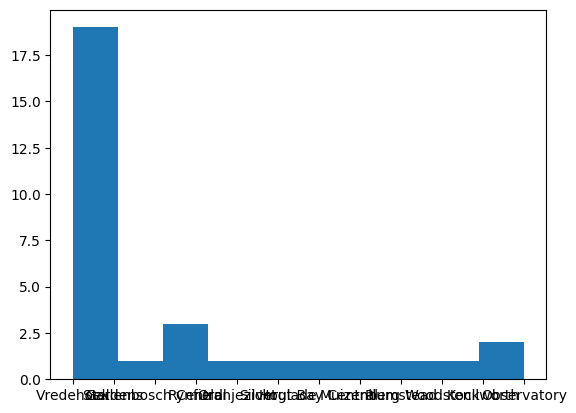

In [373]:
plt.hist(df['Suburb'])